In [9]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [10]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_nway_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

# Nway run in distnce-only mode

In [11]:
ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.766567,1.969860e-12,NaN
2,2,b'SRGe J110537.6+585120',166.406669,58.855424,0.742422,1.505411e-12,NaN
3,3,b'SRGe J102349.9+563347',155.958041,56.563186,0.724683,1.001123e-12,NaN
4,4,b'SRGe J105057.2+593215',162.738144,59.537414,0.729755,9.137326e-13,NaN
...,...,...,...,...,...,...,...
9210,9210,b'SRGe J102315.1+561957',155.813071,56.332561,4.389278,1.637604e-15,NaN
9211,9211,b'SRGe J102332.5+562524',155.885436,56.423270,3.578448,1.608667e-15,NaN
9212,9212,b'SRGe J102235.0+561919',155.645874,56.321872,3.361668,1.595806e-15,NaN
9213,9213,b'SRGe J102223.5+562357',155.597875,56.399058,3.662990,1.532857e-15,NaN


In [12]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

# nway_res_ero_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random);

    adding angular separation columns
matching: 145069 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:03<00:00, 2831.53it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [13]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway_distance_only.pkl')

NWAY PERFOMANCE ON THE VALIDATION CATALOG
Completeness and purity for nway matching 
completeness = fraction of sources with prob_has_match > p 
purity = fraction of sources with prob_has_match > p and correct nway assignment
 Completeness = 86% 
 Purity = 86% 
 prob_has_match optimal cutoff =  0.61 
 Fraction of sources with prob_has_match > 0.61 = 74%
+++Statistics+++
667 X-ray sources in validation set with counterparts
--Out of those, 91 sources were assigned hostless (prob_has_match < 0.61) 
576 sources have prob_has_match > 0.61
Out of those 576: 
--494 sources have correct nway counterpart
--82 sources have incorrect nway counterpart


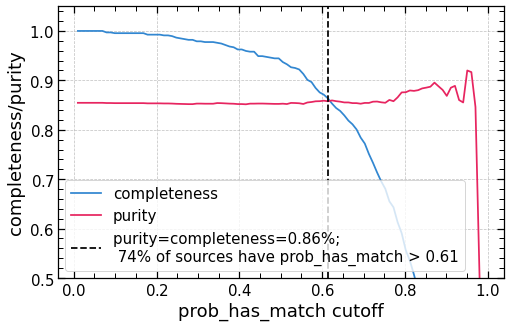

In [14]:
assess_goodnes_nway_cross_match(nway_res_ero);